In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('SEM_KeyWord_Dataset.csv')

In [3]:
df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00
1,20120524,US-Market,agile management software,1.0,1.2,21.22,8.20%,260.0,25.45
2,20120524,US-Market,crm for financial,0.0,0.0,0.00,0.00%,0.0,0.00
3,20120524,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00%,0.0,0.00
4,20120524,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00%,0.0,0.00


In [4]:
# 4 Important features of our data set
# 1- Keyword
# 2- CPC
# 3- Market
# 4- Date
# 5- Clicks -> Target feature

In [9]:
new_df = df.dropna()
new_df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00
1,20120524,US-Market,agile management software,1.0,1.2,21.22,8.20%,260.0,25.45
2,20120524,US-Market,crm for financial,0.0,0.0,0.00,0.00%,0.0,0.00
3,20120524,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00%,0.0,0.00
4,20120524,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00%,0.0,0.00


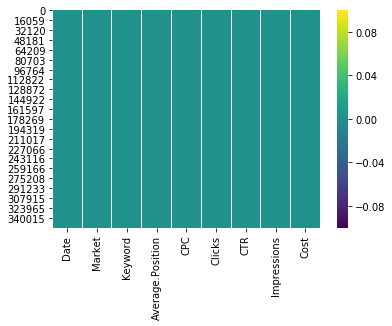

In [10]:
sns.heatmap(new_df.isnull(), cmap = 'viridis')

In [11]:
df['CTR'].dropna().head()

0    0.00%
1    8.20%
2    0.00%
3    0.00%
4    0.00%
Name: CTR, dtype: object

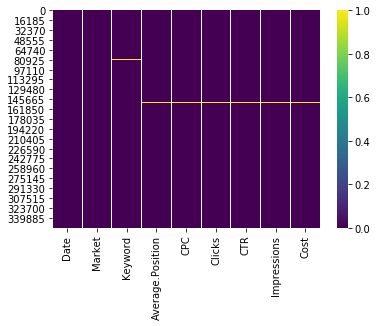

In [12]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [13]:
new_df = new_df.dropna()

In [14]:
df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00
1,20120524,US-Market,agile management software,1.0,1.2,21.22,8.20%,260.0,25.45
2,20120524,US-Market,crm for financial,0.0,0.0,0.00,0.00%,0.0,0.00
3,20120524,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00%,0.0,0.00
4,20120524,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00%,0.0,0.00


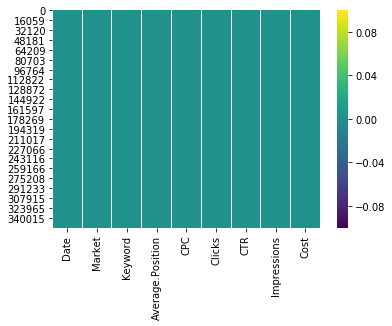

In [16]:
sns.heatmap(new_df.isnull(), cmap = 'viridis')

In [18]:
new_df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00
1,20120524,US-Market,agile management software,1.0,1.2,21.22,8.20%,260.0,25.45
2,20120524,US-Market,crm for financial,0.0,0.0,0.00,0.00%,0.0,0.00
3,20120524,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00%,0.0,0.00
4,20120524,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00%,0.0,0.00


In [19]:
new_df['CTR'].isnull().value_counts()

False    352540
Name: CTR, dtype: int64

In [25]:
# new_df.head()

def drop_punc(x):
    x = str(x)
    x = x.replace('%', '')
    x = float(x)
    return x

new_df['CTR'] = new_df['CTR'].apply(lambda x: float(str(x).replace('%', '')))

print(new_df['CTR'].dtype)
new_df.head()

float64


,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,US-Market,secure online back up,0.0,0.0,0.00,0.0,0.0,0.00
1,20120524,US-Market,agile management software,1.0,1.2,21.22,8.2,260.0,25.45
2,20120524,US-Market,crm for financial,0.0,0.0,0.00,0.0,0.0,0.00
3,20120524,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.0,0.0,0.00
4,20120524,US-Market,tracking a vehicle,0.0,0.0,0.00,0.0,0.0,0.00


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
new_df['Market'] = pd.get_dummies(new_df['Market'])

In [30]:
new_df.head()
new_df['Market'].value_counts()

0    229163
1    123377
Name: Market, dtype: int64

In [31]:
new_df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,0,secure online back up,0.0,0.0,0.00,0.0,0.0,0.00
1,20120524,0,agile management software,1.0,1.2,21.22,8.2,260.0,25.45
2,20120524,0,crm for financial,0.0,0.0,0.00,0.0,0.0,0.00
3,20120524,0,disaster recovery planning for it,0.0,0.0,0.00,0.0,0.0,0.00
4,20120524,0,tracking a vehicle,0.0,0.0,0.00,0.0,0.0,0.00


In [35]:
X = new_df.drop(['Date', 'Clicks', 'Keyword'], axis = 1)
y = new_df['Clicks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
predictions = model.predict(X_test)

In [39]:
from sklearn import metrics

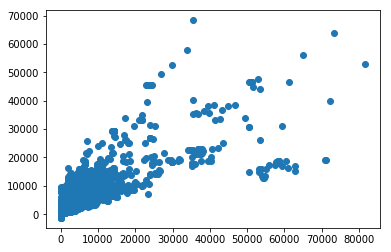

In [40]:
plt.scatter(y_test, predictions)

In [41]:
metrics.mean_absolute_error(y_test, predictions)

152.6879707042707

In [42]:
(metrics.mean_squared_error(y_test, predictions) ** 0.5)

936.8941946096427

/home/umairshah/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


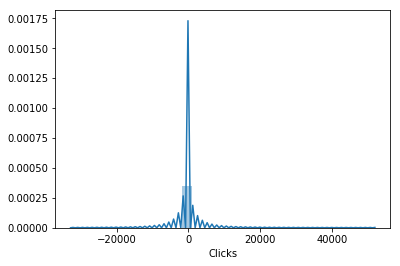

In [43]:
sns.distplot((y_test-predictions), bins = 30)

In [73]:
freq_d = pd.Series(' '.join(df['Keyword']).split()).value_counts()

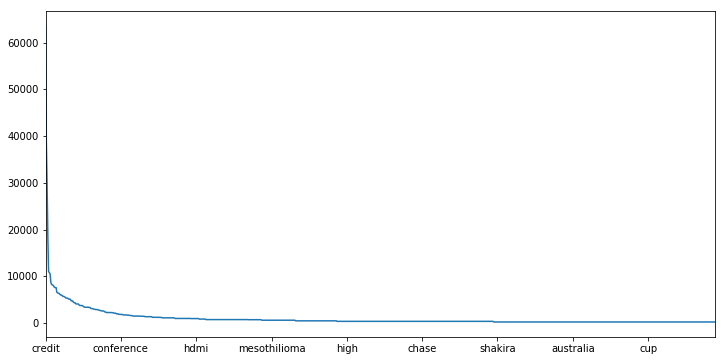

In [75]:
plt.figure(figsize = (12,6))
freq_d.plot(kind='line', ax=None, figsize=None, use_index=True,
            title=None, grid=None, legend=False, style=None,
            logx=False, logy=False, loglog=False, xticks=None,
            yticks=None, xlim=None, ylim=None, rot=None,
            fontsize=None, colormap=None, table=False, yerr=None,
            xerr=None, label=None, secondary_y=False)

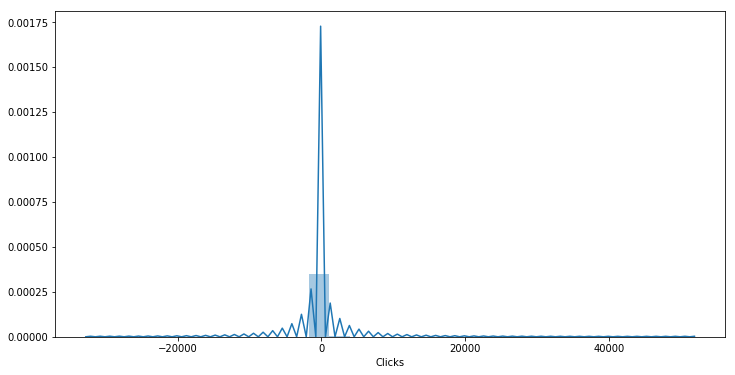

In [44]:
plt.figure(figsize = (12,6))
sns.distplot((y_test - predictions), bins = 30)

In [45]:
metrics.r2_score(y_test, predictions)

0.7081688542986211

## Dropping Zeros values for CPC:

In [46]:
new_df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,20120524,0,secure online back up,0.0,0.0,0.00,0.0,0.0,0.00
1,20120524,0,agile management software,1.0,1.2,21.22,8.2,260.0,25.45
2,20120524,0,crm for financial,0.0,0.0,0.00,0.0,0.0,0.00
3,20120524,0,disaster recovery planning for it,0.0,0.0,0.00,0.0,0.0,0.00
4,20120524,0,tracking a vehicle,0.0,0.0,0.00,0.0,0.0,0.00


In [52]:
from sklearn.utils import shuffle

new_df = shuffle(new_df)

In [53]:
new_df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
104139,20130129,0,cupcakes,1.0,0.91,647.23,2.2,29408.0,591.25
103984,20130129,0,developing mobile application,0.0,0.00,0.00,0.0,0.0,0.00
213350,20130109,0,consolidation,1.0,9.10,78.81,2.0,3849.0,717.30
196166,20121214,0,commodities futures trading,1.0,0.63,2.37,2.2,105.0,1.49
285547,20121019,1,free home insurance quote,0.0,0.00,0.00,0.0,0.0,0.00


In [54]:
new_df = new_df[new_df['CPC'] != 0]
new_df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
104139,20130129,0,cupcakes,1.0,0.91,647.23,2.2,29408.0,591.25
213350,20130109,0,consolidation,1.0,9.10,78.81,2.0,3849.0,717.30
196166,20121214,0,commodities futures trading,1.0,0.63,2.37,2.2,105.0,1.49
44927,20120914,0,nikon coolpix,1.0,4.07,64.98,0.2,29906.0,264.21
310971,20121130,1,private health insurance,1.0,75.69,32.55,2.8,1170.0,2463.84


In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203595 entries, 104139 to 34727
Data columns (total 9 columns):
Date                203595 non-null int64
Market              203595 non-null uint8
Keyword             203595 non-null object
Average.Position    203595 non-null float64
CPC                 203595 non-null float64
Clicks              203595 non-null float64
CTR                 203595 non-null float64
Impressions         203595 non-null float64
Cost                203595 non-null float64
dtypes: float64(6), int64(1), object(1), uint8(1)
memory usage: 14.2+ MB


In [72]:
X1 = new_df.drop(['Date', 'CTR', 'Average.Position', 'Clicks', 'Keyword'], axis = 1)
y1 = new_df['Clicks']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=101)

In [73]:
model = LinearRegression()

In [74]:
model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
predictions = model.predict(X1_test)

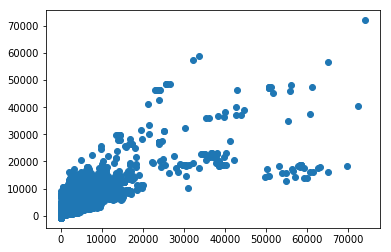

In [77]:
from sklearn import metrics
plt.scatter(y1_test, predictions)

In [79]:
metrics.mean_absolute_error(y1_test, predictions)

196.75284801174053

In [80]:
(metrics.mean_squared_error(y1_test, predictions) ** 0.5)

1227.9104676903664

In [81]:
metrics.r2_score(y1_test, predictions)

0.6962728047211676

In [82]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha = 0.5)

reg.fit(X1_train, y1_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
reg_predictions = reg.predict(X1_test)

In [85]:
metrics.r2_score(y1_test, reg_predictions)

0.6962728049462616

In [86]:
lasso = linear_model.Lasso(alpha = 0.1)

lasso.fit(X1_train, y1_train)

lasso_predictions = lasso.predict(X1_test)

print("Lasso r2 score is: ", metrics.r2_score(y1_test, lasso_predictions))

Lasso r2 score is:  0.6962731517316403
